In [2]:
# Calculating currents in each ring on fft way for border structure
import numpy as np
from Fast_Method import solvesystem
from Geometry import Rectangle_packing
from Impedance_matrix import M_0
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
Params['R'] = 0.01
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
import json

Inductance = {}
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
Omega =  np.linspace(omega_0*0.9, omega_0*1.1, 1000)
H_0z = 1
mu_0 = 4 * np.pi * 1e-7
# Calculate polarisation for different structures

Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
# Initial position of the first ring for each orientation
R0 = {
    'z': {'nz': 0, 'ny': Dy/2, 'nx': Dx/2},
    'y': {'nz': Dz/2, 'ny': 0, 'nx': Dx/2},
    'x': {'nz': Dz/2, 'ny': Dy/2, 'nx': 0}
}
#Total number of rings for each orientation
N = 20*20*20
for n_other in range(1, 21):
    NZ = N // (n_other ** 2) 
    shape = {
        'z': {'nz': NZ+1, 'ny': n_other, 'nx': n_other},
        'y': {'nz': NZ, 'ny': n_other+1, 'nx': n_other},
        'x': {'nz': NZ, 'ny': n_other, 'nx': n_other+1}
    }
    Params['N'] = shape
    # make 3d structure
    print(f'\n Make rings: {Params["N"]}')
    Rings_4d ={}
    for pos in Params['N']:
        Rings_4d[pos] = Rectangle_packing(Params, r0 = R0[pos], orientation=pos).reshape(
                                                     Params['N'][pos]['nz'],
                                                     Params['N'][pos]['ny'],
                                                     Params['N'][pos]['nx'])
    Params['Number'] = np.sum([Rings_4d[pos].size for pos in Params['N']])
    print([Rings_4d[pos].size for pos in Params['N']], Params['Number'])

    Currents = solvesystem(Rings_4d, M_0(Params), Omega, phi_0z=H_0z * mu_0*np.pi * Radius ** 2, Inductance = Inductance, tol = 1e-3)

    Nz, Ny, Nx = [Params['N'][pos][f'n{pos}'] for pos in Params['N']]
    Volume =  (Nx-1) * (Ny-1) * (Nz-1) * Dz * Dy * Dx
    P_0z = np.pi * Radius ** 2 /Volume/H_0z
    Currents['Shape'] = shape
    Currents['RealPolarisation'] = [P_0z * sum(i) for i in Currents['RealCurrents']]
    Currents['ImagPolarisation'] = [P_0z * sum(i) for i in Currents['ImagCurrents']]
    dims = ''.join([pos for pos in Params['N']])
    with open(f"Data/Form_Data/izotropic/BorderCurrents-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(Currents, f)

    exclude = ['RealCurrents', 'ImagCurrents']
    data = {key: value for key, value in Currents.items() if key not in exclude}
    with open(f"Data/Form_Data/izotropic/BorderData-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(data, f)



 Make rings: {'z': {'nz': 8001, 'ny': 1, 'nx': 1}, 'y': {'nz': 8000, 'ny': 2, 'nx': 1}, 'x': {'nz': 8000, 'ny': 1, 'nx': 2}}
[8001, 16000, 16000] 40001
Cirvecs forming


100%|██████████| 3/3 [00:28<00:00,  9.56s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [03:28<00:00,  4.80it/s]


FFT solving: Done, shape = [('z', (8001, 1, 1)), ('y', (8000, 2, 1)), ('x', (8000, 1, 2))]

 Make rings: {'z': {'nz': 2001, 'ny': 2, 'nx': 2}, 'y': {'nz': 2000, 'ny': 3, 'nx': 2}, 'x': {'nz': 2000, 'ny': 2, 'nx': 3}}
[8004, 12000, 12000] 32004
Cirvecs forming


100%|██████████| 3/3 [00:24<00:00,  8.26s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [04:06<00:00,  4.05it/s]


FFT solving: Done, shape = [('z', (2001, 2, 2)), ('y', (2000, 3, 2)), ('x', (2000, 2, 3))]

 Make rings: {'z': {'nz': 889, 'ny': 3, 'nx': 3}, 'y': {'nz': 888, 'ny': 4, 'nx': 3}, 'x': {'nz': 888, 'ny': 3, 'nx': 4}}
[8001, 10656, 10656] 29313
Cirvecs forming


100%|██████████| 3/3 [00:16<00:00,  5.62s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [13:14<00:00,  1.26it/s]   


FFT solving: Done, shape = [('z', (889, 3, 3)), ('y', (888, 4, 3)), ('x', (888, 3, 4))]

 Make rings: {'z': {'nz': 501, 'ny': 4, 'nx': 4}, 'y': {'nz': 500, 'ny': 5, 'nx': 4}, 'x': {'nz': 500, 'ny': 4, 'nx': 5}}
[8016, 10000, 10000] 28016
Cirvecs forming


100%|██████████| 3/3 [00:13<00:00,  4.61s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:23<00:00,  2.61it/s]


FFT solving: Done, shape = [('z', (501, 4, 4)), ('y', (500, 5, 4)), ('x', (500, 4, 5))]

 Make rings: {'z': {'nz': 321, 'ny': 5, 'nx': 5}, 'y': {'nz': 320, 'ny': 6, 'nx': 5}, 'x': {'nz': 320, 'ny': 5, 'nx': 6}}
[8025, 9600, 9600] 27225
Cirvecs forming


100%|██████████| 3/3 [06:51<00:00, 137.17s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [05:15<00:00,  3.17it/s]


FFT solving: Done, shape = [('z', (321, 5, 5)), ('y', (320, 6, 5)), ('x', (320, 5, 6))]

 Make rings: {'z': {'nz': 223, 'ny': 6, 'nx': 6}, 'y': {'nz': 222, 'ny': 7, 'nx': 6}, 'x': {'nz': 222, 'ny': 6, 'nx': 7}}
[8028, 9324, 9324] 26676
Cirvecs forming


100%|██████████| 3/3 [00:21<00:00,  7.05s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [08:24<00:00,  1.98it/s]


FFT solving: Done, shape = [('z', (223, 6, 6)), ('y', (222, 7, 6)), ('x', (222, 6, 7))]

 Make rings: {'z': {'nz': 164, 'ny': 7, 'nx': 7}, 'y': {'nz': 163, 'ny': 8, 'nx': 7}, 'x': {'nz': 163, 'ny': 7, 'nx': 8}}
[8036, 9128, 9128] 26292
Cirvecs forming


100%|██████████| 3/3 [00:09<00:00,  3.17s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:37<00:00,  2.52it/s]


FFT solving: Done, shape = [('z', (164, 7, 7)), ('y', (163, 8, 7)), ('x', (163, 7, 8))]

 Make rings: {'z': {'nz': 126, 'ny': 8, 'nx': 8}, 'y': {'nz': 125, 'ny': 9, 'nx': 8}, 'x': {'nz': 125, 'ny': 8, 'nx': 9}}
[8064, 9000, 9000] 26064
Cirvecs forming


100%|██████████| 3/3 [00:08<00:00,  2.94s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:10<00:00,  2.70it/s]


FFT solving: Done, shape = [('z', (126, 8, 8)), ('y', (125, 9, 8)), ('x', (125, 8, 9))]

 Make rings: {'z': {'nz': 99, 'ny': 9, 'nx': 9}, 'y': {'nz': 98, 'ny': 10, 'nx': 9}, 'x': {'nz': 98, 'ny': 9, 'nx': 10}}
[8019, 8820, 8820] 25659
Cirvecs forming


100%|██████████| 3/3 [00:08<00:00,  2.68s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:35<00:00,  2.53it/s]


FFT solving: Done, shape = [('z', (99, 9, 9)), ('y', (98, 10, 9)), ('x', (98, 9, 10))]

 Make rings: {'z': {'nz': 81, 'ny': 10, 'nx': 10}, 'y': {'nz': 80, 'ny': 11, 'nx': 10}, 'x': {'nz': 80, 'ny': 10, 'nx': 11}}
[8100, 8800, 8800] 25700
Cirvecs forming


100%|██████████| 3/3 [00:07<00:00,  2.57s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]


FFT solving: Done, shape = [('z', (81, 10, 10)), ('y', (80, 11, 10)), ('x', (80, 10, 11))]

 Make rings: {'z': {'nz': 67, 'ny': 11, 'nx': 11}, 'y': {'nz': 66, 'ny': 12, 'nx': 11}, 'x': {'nz': 66, 'ny': 11, 'nx': 12}}
[8107, 8712, 8712] 25531
Cirvecs forming


100%|██████████| 3/3 [00:07<00:00,  2.45s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [07:35<00:00,  2.19it/s]


FFT solving: Done, shape = [('z', (67, 11, 11)), ('y', (66, 12, 11)), ('x', (66, 11, 12))]

 Make rings: {'z': {'nz': 56, 'ny': 12, 'nx': 12}, 'y': {'nz': 55, 'ny': 13, 'nx': 12}, 'x': {'nz': 55, 'ny': 12, 'nx': 13}}
[8064, 8580, 8580] 25224
Cirvecs forming


100%|██████████| 3/3 [00:06<00:00,  2.27s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [08:19<00:00,  2.00it/s]


FFT solving: Done, shape = [('z', (56, 12, 12)), ('y', (55, 13, 12)), ('x', (55, 12, 13))]

 Make rings: {'z': {'nz': 48, 'ny': 13, 'nx': 13}, 'y': {'nz': 47, 'ny': 14, 'nx': 13}, 'x': {'nz': 47, 'ny': 13, 'nx': 14}}
[8112, 8554, 8554] 25220
Cirvecs forming


100%|██████████| 3/3 [00:06<00:00,  2.25s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [07:41<00:00,  2.17it/s]


FFT solving: Done, shape = [('z', (48, 13, 13)), ('y', (47, 14, 13)), ('x', (47, 13, 14))]

 Make rings: {'z': {'nz': 41, 'ny': 14, 'nx': 14}, 'y': {'nz': 40, 'ny': 15, 'nx': 14}, 'x': {'nz': 40, 'ny': 14, 'nx': 15}}
[8036, 8400, 8400] 24836
Cirvecs forming


100%|██████████| 3/3 [00:06<00:00,  2.06s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:15<00:00,  2.66it/s]


FFT solving: Done, shape = [('z', (41, 14, 14)), ('y', (40, 15, 14)), ('x', (40, 14, 15))]

 Make rings: {'z': {'nz': 36, 'ny': 15, 'nx': 15}, 'y': {'nz': 35, 'ny': 16, 'nx': 15}, 'x': {'nz': 35, 'ny': 15, 'nx': 16}}
[8100, 8400, 8400] 24900
Cirvecs forming


100%|██████████| 3/3 [00:05<00:00,  1.98s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [07:47<00:00,  2.14it/s]


FFT solving: Done, shape = [('z', (36, 15, 15)), ('y', (35, 16, 15)), ('x', (35, 15, 16))]

 Make rings: {'z': {'nz': 32, 'ny': 16, 'nx': 16}, 'y': {'nz': 31, 'ny': 17, 'nx': 16}, 'x': {'nz': 31, 'ny': 16, 'nx': 17}}
[8192, 8432, 8432] 25056
Cirvecs forming


100%|██████████| 3/3 [00:05<00:00,  1.97s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [10:15<00:00,  1.63it/s]


FFT solving: Done, shape = [('z', (32, 16, 16)), ('y', (31, 17, 16)), ('x', (31, 16, 17))]

 Make rings: {'z': {'nz': 28, 'ny': 17, 'nx': 17}, 'y': {'nz': 27, 'ny': 18, 'nx': 17}, 'x': {'nz': 27, 'ny': 17, 'nx': 18}}
[8092, 8262, 8262] 24616
Cirvecs forming


100%|██████████| 3/3 [00:05<00:00,  1.85s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:54<00:00,  2.41it/s]


FFT solving: Done, shape = [('z', (28, 17, 17)), ('y', (27, 18, 17)), ('x', (27, 17, 18))]

 Make rings: {'z': {'nz': 25, 'ny': 18, 'nx': 18}, 'y': {'nz': 24, 'ny': 19, 'nx': 18}, 'x': {'nz': 24, 'ny': 18, 'nx': 19}}
[8100, 8208, 8208] 24516
Cirvecs forming


100%|██████████| 3/3 [00:05<00:00,  1.79s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [06:05<00:00,  2.74it/s]


FFT solving: Done, shape = [('z', (25, 18, 18)), ('y', (24, 19, 18)), ('x', (24, 18, 19))]

 Make rings: {'z': {'nz': 23, 'ny': 19, 'nx': 19}, 'y': {'nz': 22, 'ny': 20, 'nx': 19}, 'x': {'nz': 22, 'ny': 19, 'nx': 20}}
[8303, 8360, 8360] 25023
Cirvecs forming


100%|██████████| 3/3 [00:05<00:00,  1.78s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [09:42<00:00,  1.72it/s]


FFT solving: Done, shape = [('z', (23, 19, 19)), ('y', (22, 20, 19)), ('x', (22, 19, 20))]

 Make rings: {'z': {'nz': 21, 'ny': 20, 'nx': 20}, 'y': {'nz': 20, 'ny': 21, 'nx': 20}, 'x': {'nz': 20, 'ny': 20, 'nx': 21}}
[8400, 8400, 8400] 25200
Cirvecs forming


100%|██████████| 3/3 [00:05<00:00,  1.73s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [05:19<00:00,  3.13it/s]


FFT solving: Done, shape = [('z', (21, 20, 20)), ('y', (20, 21, 20)), ('x', (20, 20, 21))]


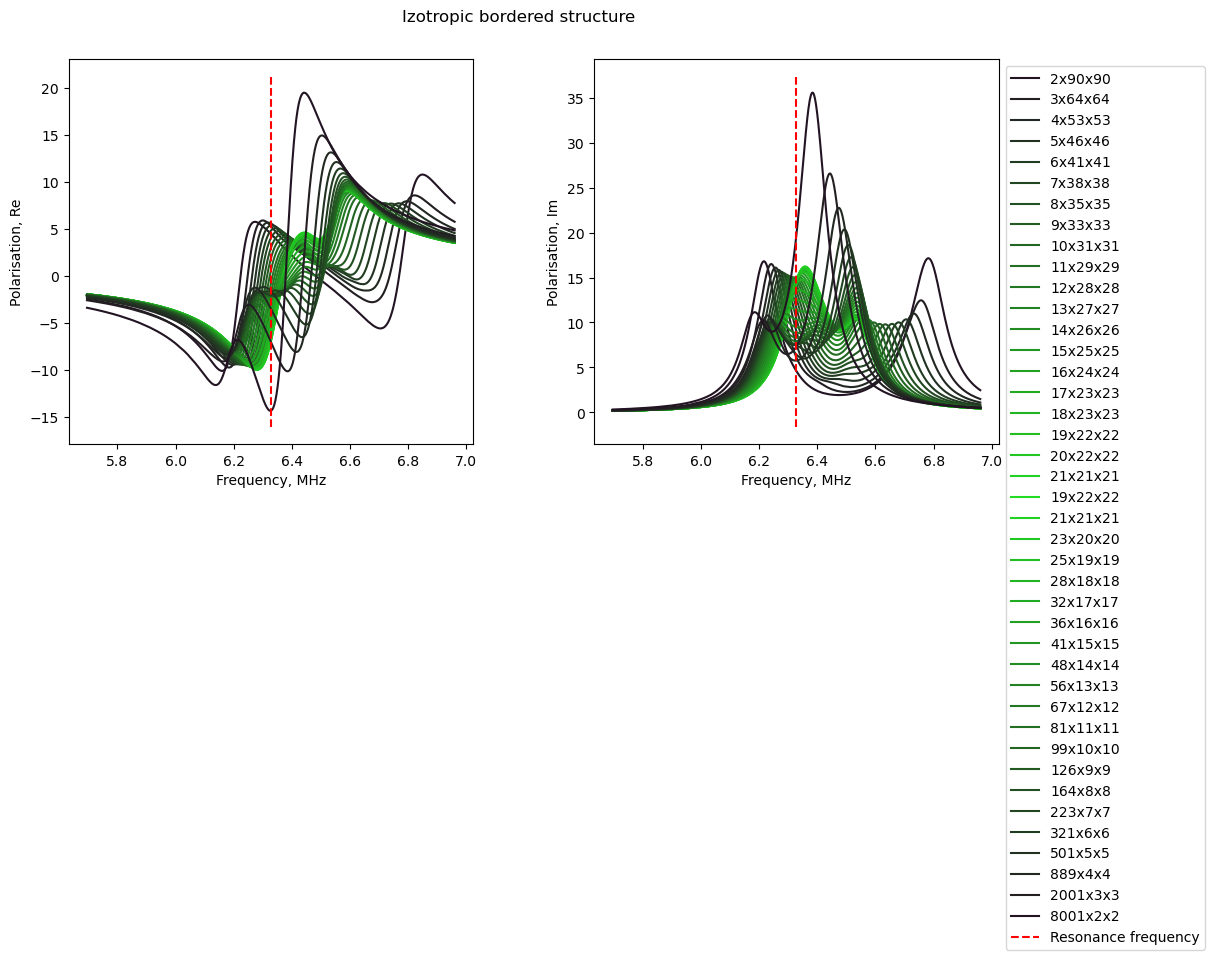

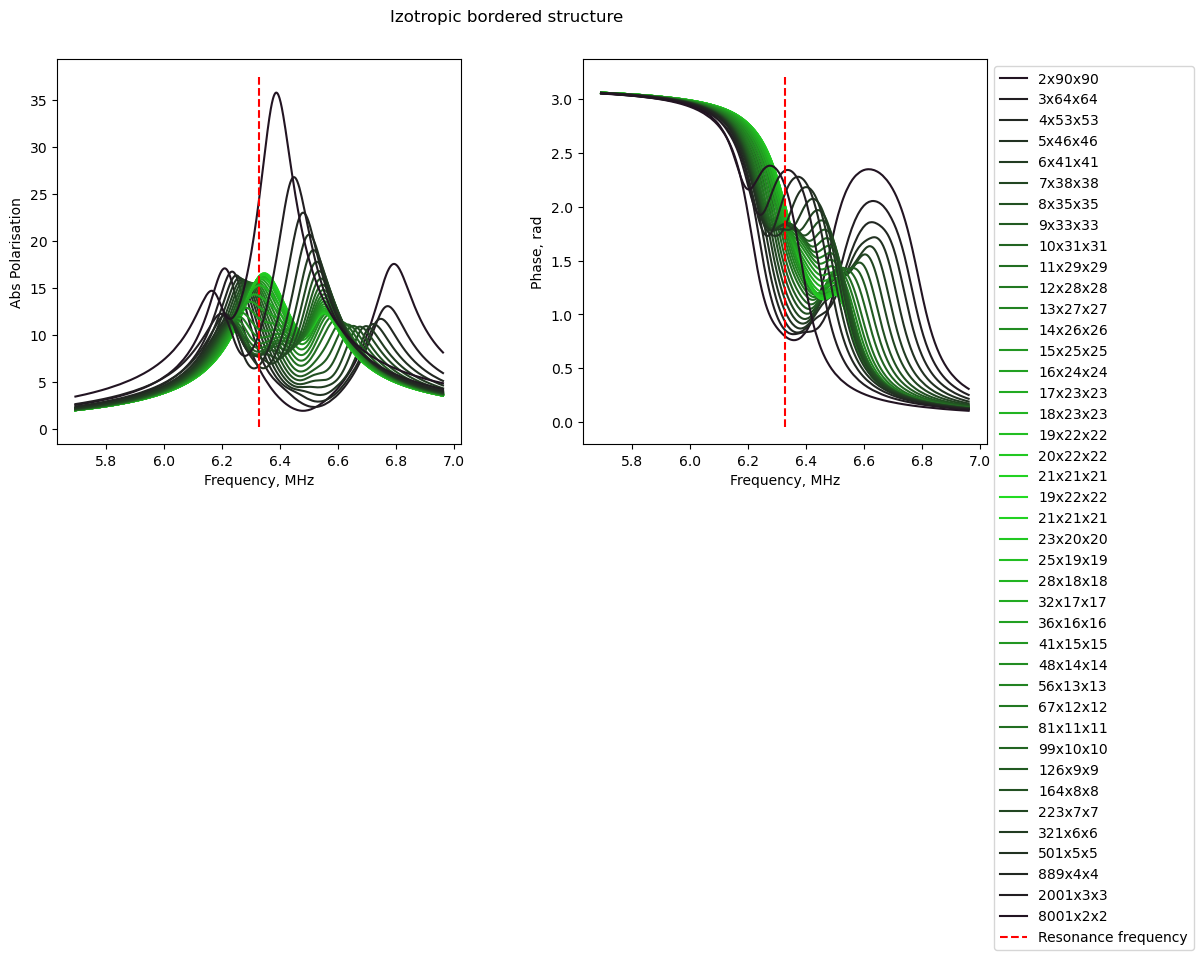

In [7]:
# Compare different shapes in border structure
import matplotlib.pyplot as plt
import numpy as np
import json
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
Params['R'] = 0.01
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
import json


mu_0 = 4 * np.pi * 10**-7

plt.figure(figsize=(12, 5))
N = 20*20*20
for NZ in range(1, 21):
    Nz, Ny, Nx = NZ+1, round(np.sqrt(N/NZ))+1, round(np.sqrt(N/NZ))+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure")
    color = f'#22{hex((NZ+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    plt.subplot(121)
    

    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

for n_other in range(21, 0, -1):
    Nz, Ny, Nx = N//(n_other ** 2)+1, n_other+1, n_other+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure")
    color = f'#22{hex((n_other+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    plt.subplot(121)
    

    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

plt.subplot(121)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
#plt.legend()
plt.subplot(122)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig(f"Plots/Form/IzoBorderPolarisationImRe-s2.png")
plt.show()

plt.figure(figsize=(12, 5))
for NZ in range(1, 21):
    Nz, Ny, Nx = NZ+1, round(np.sqrt(N/NZ))+1, round(np.sqrt(N/NZ))+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure")
    color = f'#22{hex((NZ+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    Polarisation = RealPolarisation + 1j * ImagPolarisation
    AbsPolarisation = np.abs(Polarisation)
    PhasePolarisation = np.angle(Polarisation)

    plt.subplot(121)
    
    plt.plot(Omega/2/np.pi/10**6, AbsPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Abs Polarisation")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, PhasePolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Phase, rad")

for n_other in range(21, 0, -1):
    Nz, Ny, Nx = N//(n_other ** 2)+1, n_other+1, n_other+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure")
    color = f'#22{hex((n_other+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    Polarisation = RealPolarisation + 1j * ImagPolarisation
    AbsPolarisation = np.abs(Polarisation)
    PhasePolarisation = np.angle(Polarisation)

    plt.subplot(121)
    
    plt.plot(Omega/2/np.pi/10**6, AbsPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Abs Polarisation")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, PhasePolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Phase, rad")


plt.subplot(121)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
#plt.legend()
plt.subplot(122)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig(f"Plots/Form/IzoBorderPolarisationAbsPhase-s2.png")
plt.show()

OSError: unrecognized data stream contents when reading image file

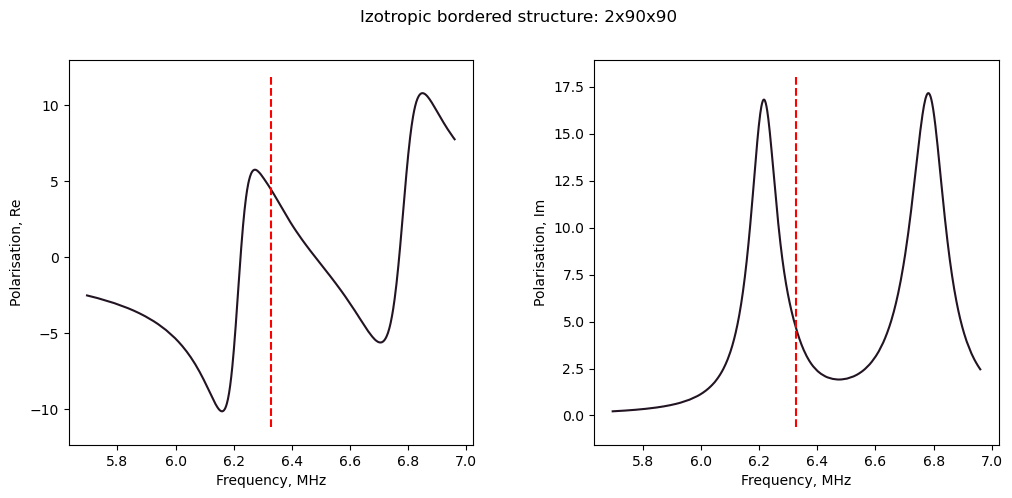

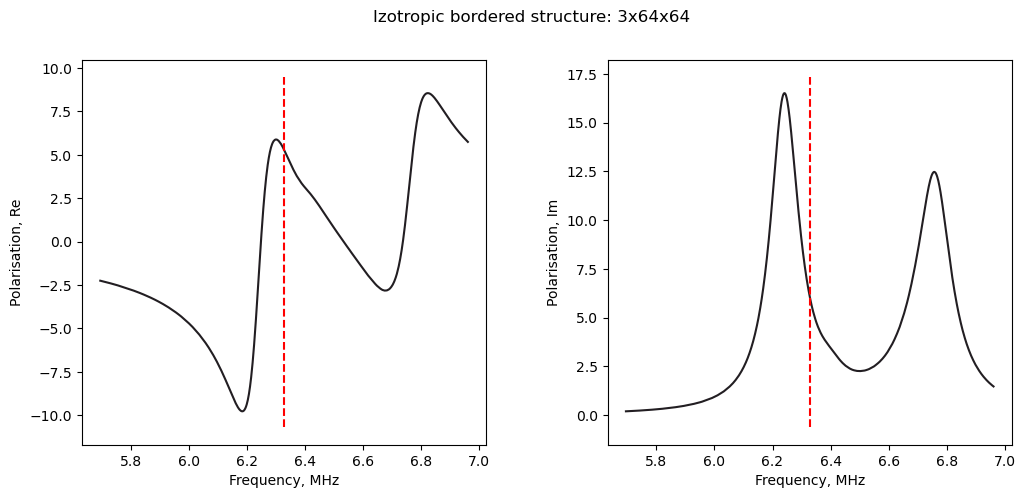

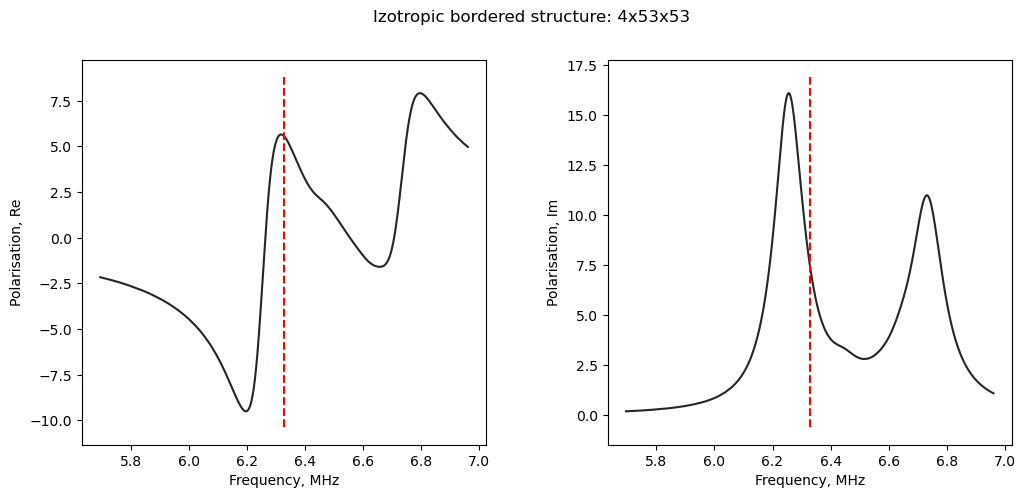

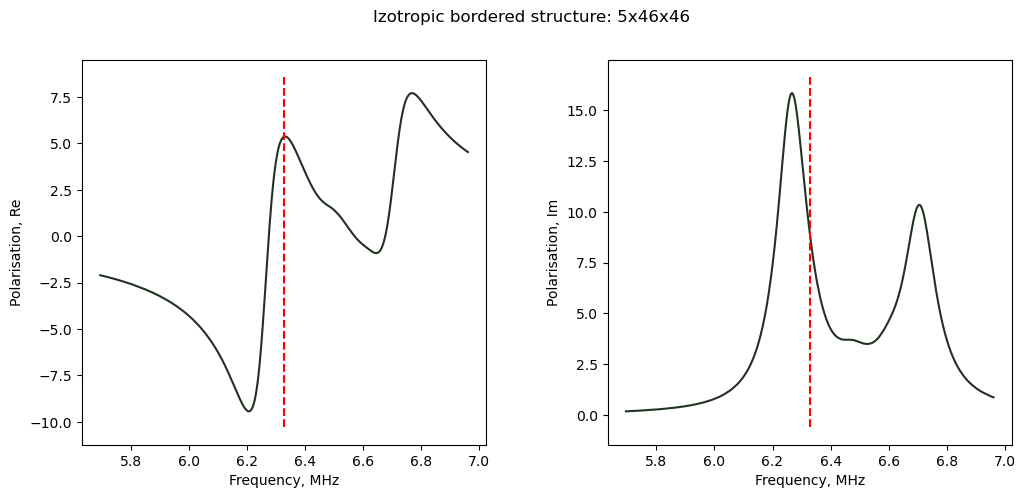

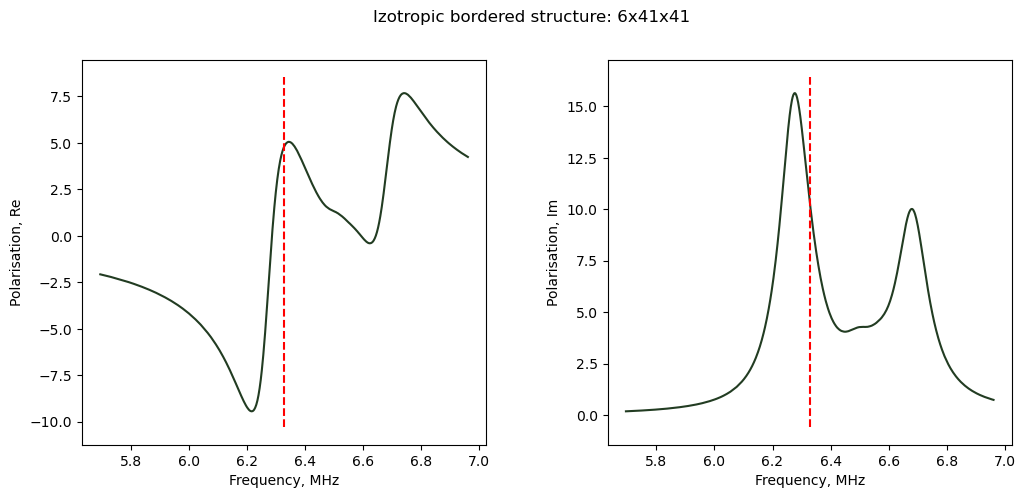

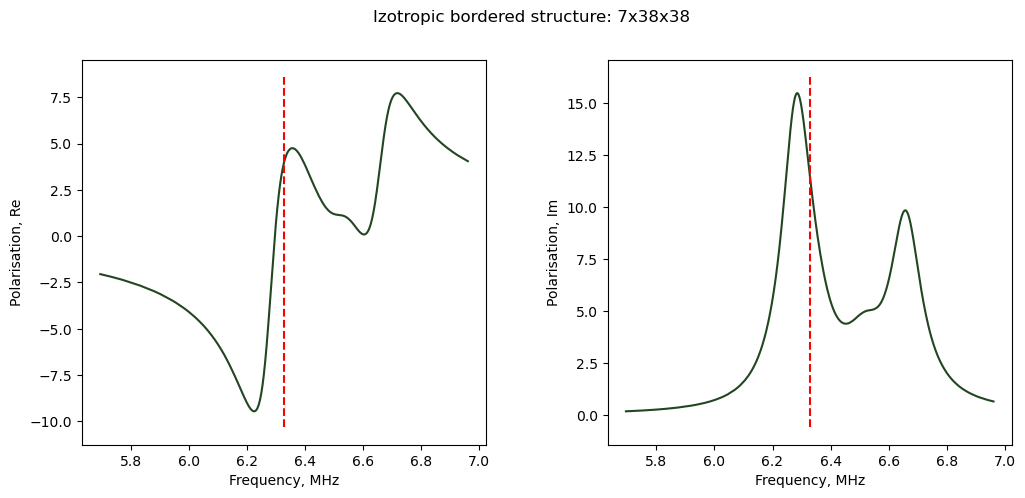

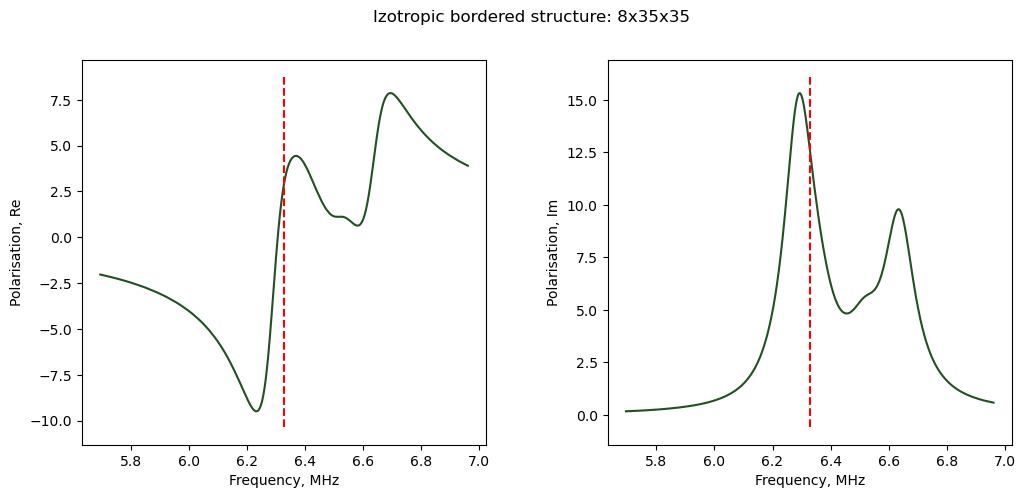

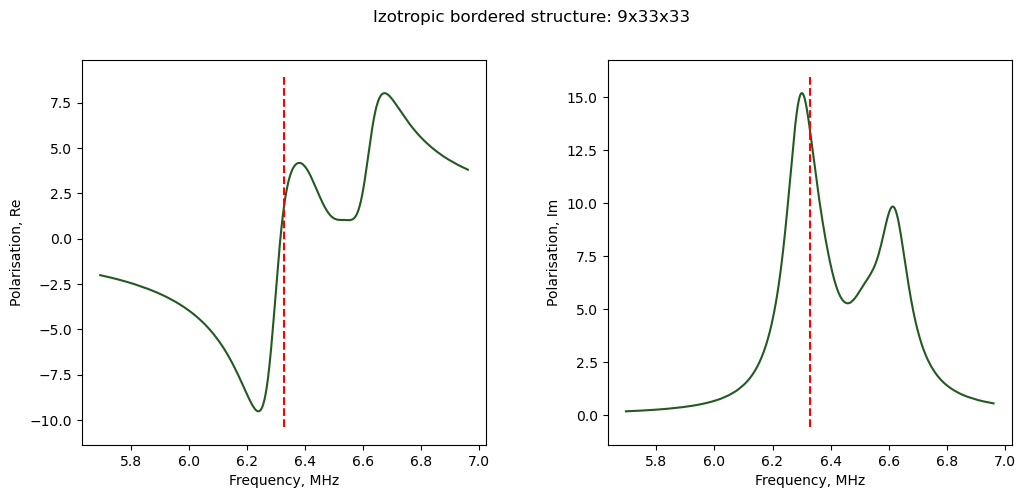

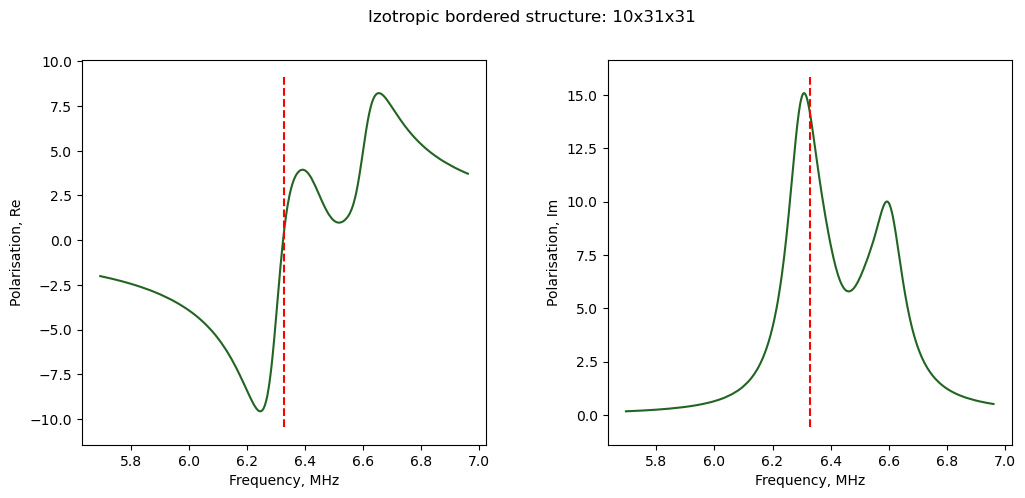

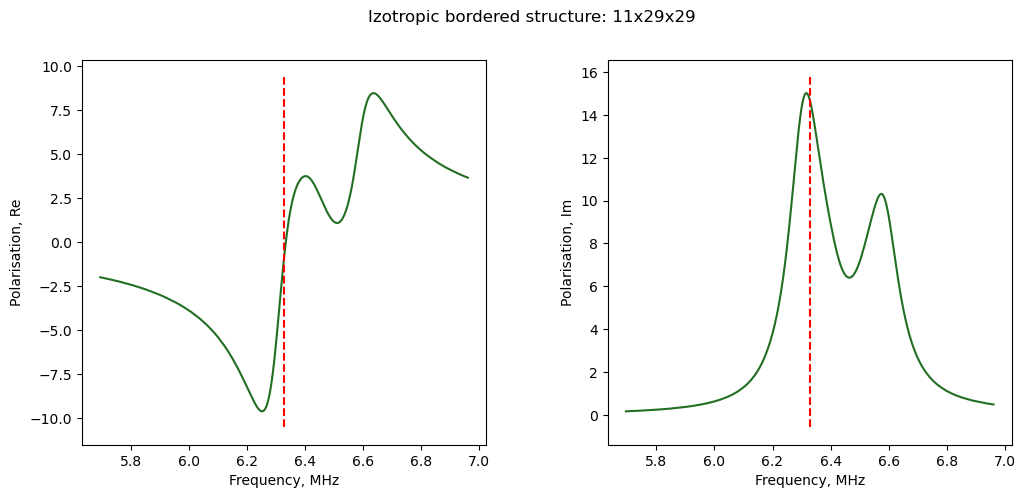

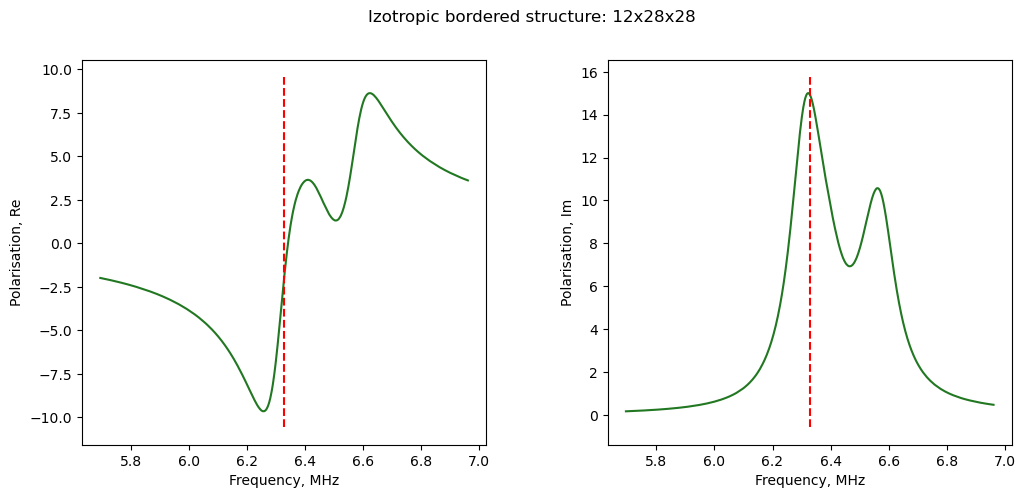

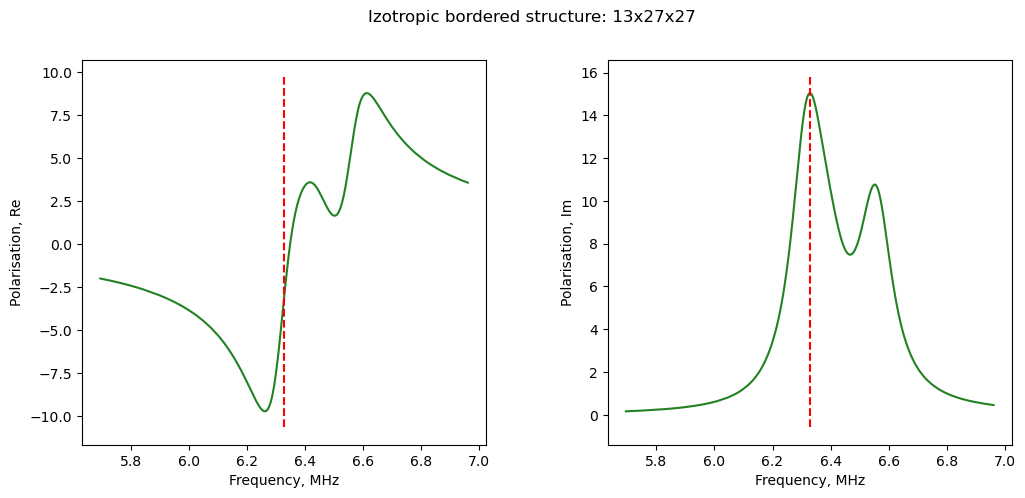

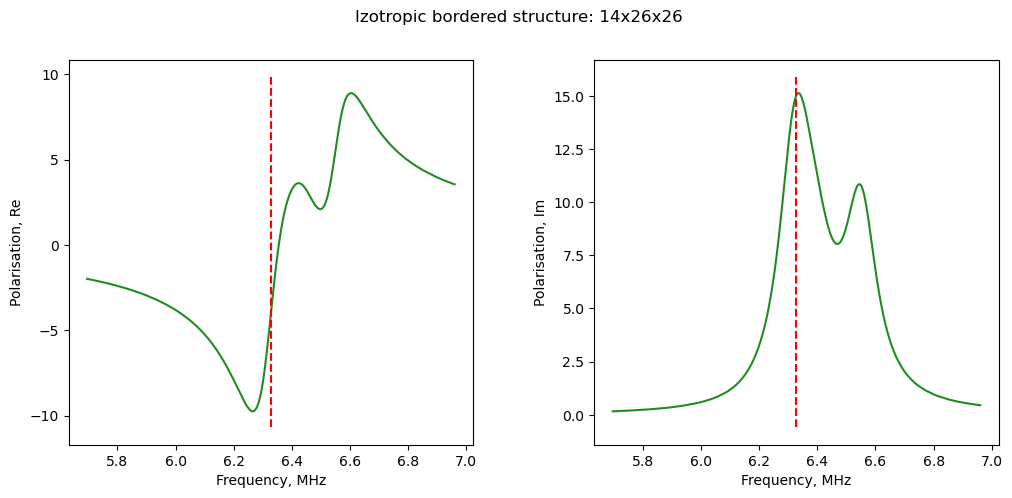

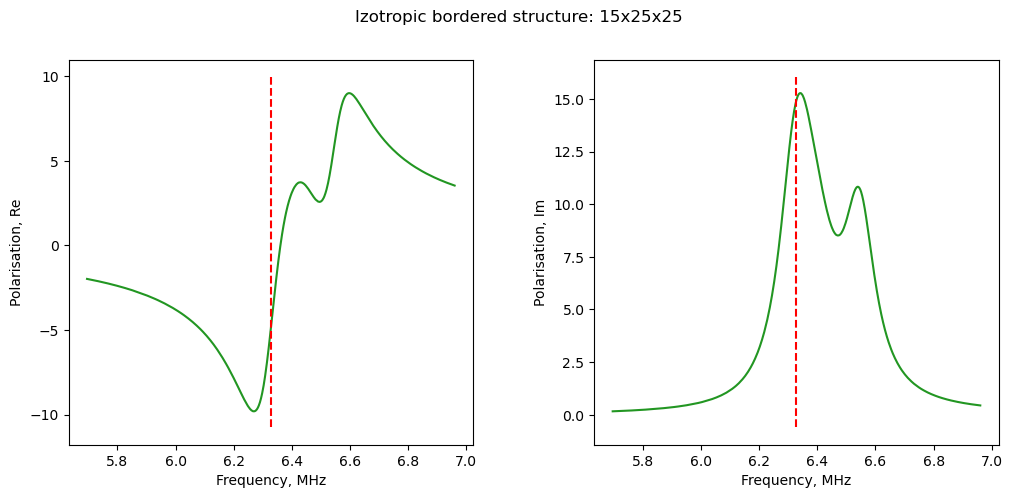

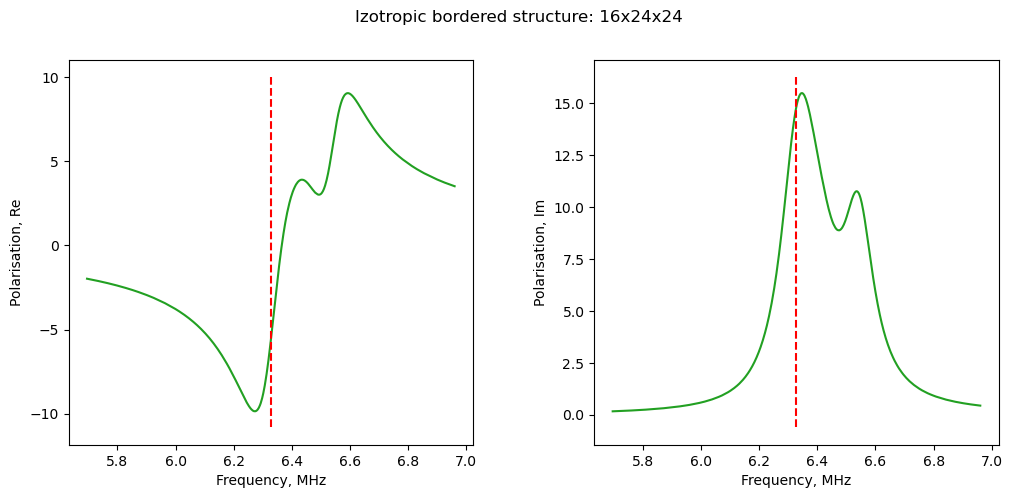

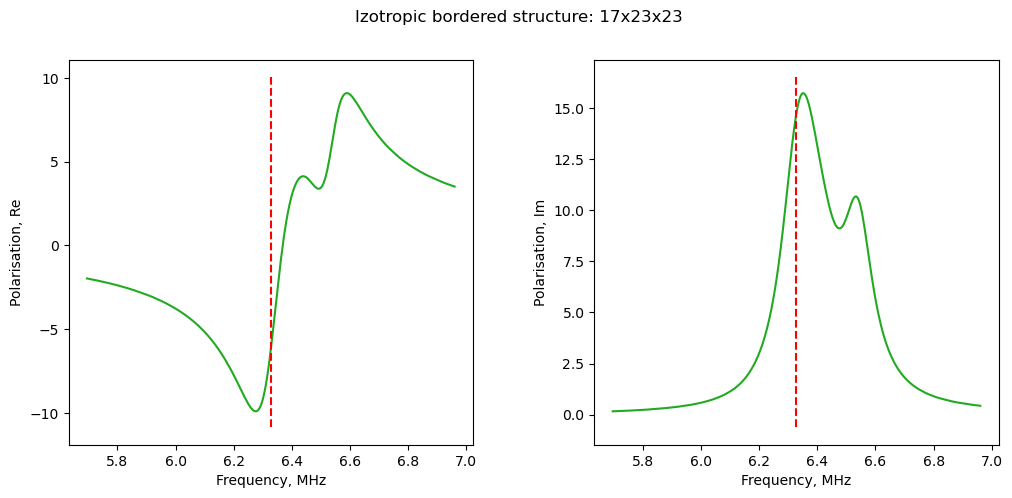

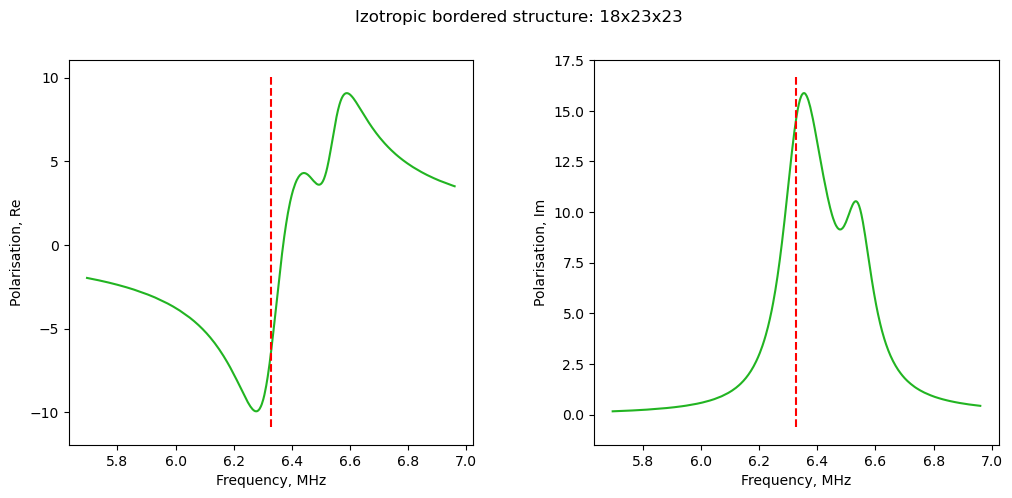

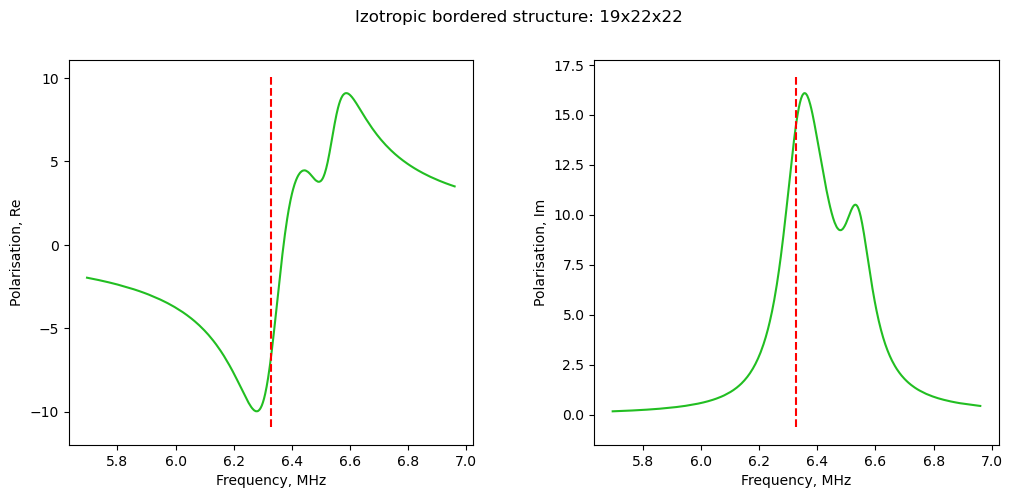

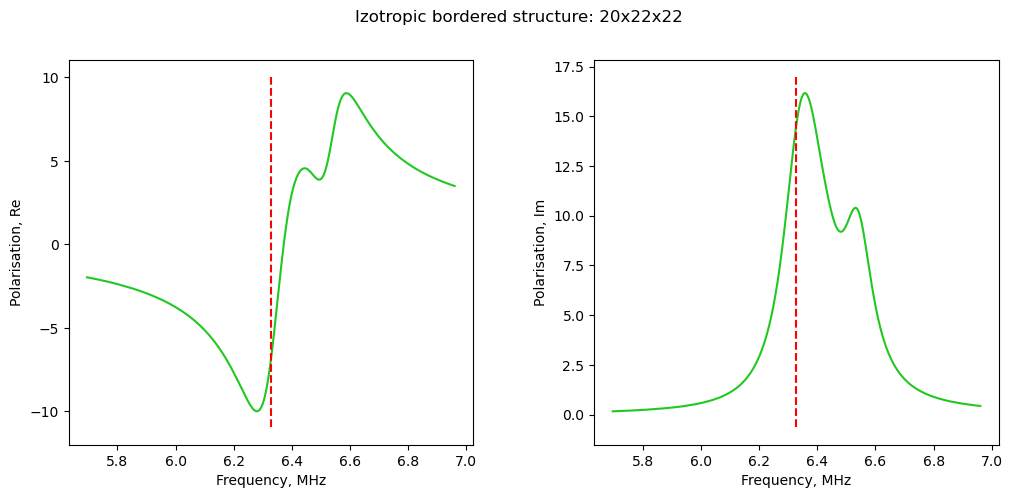

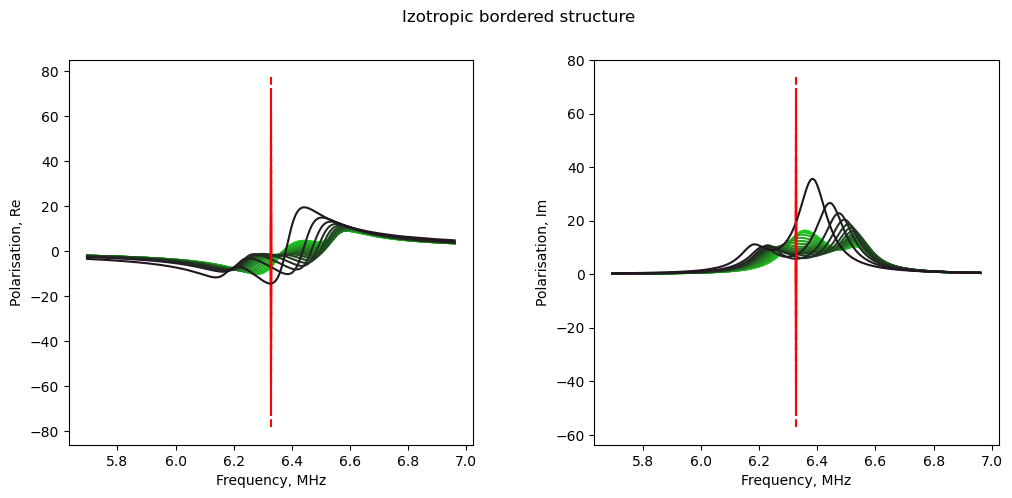

In [8]:
# Compare different shapes in border structure
import matplotlib.pyplot as plt
import numpy as np
import json
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
import json
from PIL import Image, ImageSequence

Params['R'] = 0.01
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
mu_0 = 4 * np.pi * 10**-7

N = 20*20*20

images = []

for NZ in range(1, 21):
    plt.figure(figsize=(12, 5))
    Nz, Ny, Nx = NZ+1, round(np.sqrt(N/NZ))+1, round(np.sqrt(N/NZ))+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure: {Nz}x{Ny}x{Nx}")
    color = f'#22{hex((NZ+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    plt.subplot(121)
    

    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    plt.subplot(121)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.subplot(122)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')

    plt.savefig(f"Plots/Form/FormGIF.png")
    img = Image.open('Plots/Form/FormGIF.png')
    images.append(img)


for n_other in range(21, 0, -1):
    plt.figure(figsize=(12, 5))
    Nz, Ny, Nx = N//(n_other ** 2)+1, n_other+1, n_other+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure")
    color = f'#22{hex((n_other+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    plt.subplot(121)
    

    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    plt.subplot(121)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.subplot(122)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')

    plt.savefig(f"Plots/Form/FormGIF.png")
    img = Image.open('Plots/Form/FormGIF.png')
    images.append(img)

images[0].save('Plots/Form/FormGIF_ReIm.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)


In [ ]:
# Compare different shapes in border structure
import matplotlib.pyplot as plt
import numpy as np
import json
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
import json
from PIL import Image, ImageSequence

Params['R'] = 0.01
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
mu_0 = 4 * np.pi * 10**-7

N = 20*20*20

images = []

for NZ in range(1, 21):
    plt.figure(figsize=(12, 5))
    Nz, Ny, Nx = NZ+1, round(np.sqrt(N/NZ))+1, round(np.sqrt(N/NZ))+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure: {Nz}x{Ny}x{Nx}")
    color = f'#22{hex((NZ+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    Polarisation = RealPolarisation + 1j * ImagPolarisation
    AbsPolarisation = np.abs(Polarisation)
    PhasePolarisation = np.angle(Polarisation)

    plt.subplot(121)
    
    plt.plot(Omega/2/np.pi/10**6, AbsPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Abs Polarisation")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, PhasePolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Phase, rad")

    plt.subplot(121)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.subplot(122)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')

    plt.savefig(f"Plots/Form/FormGIF.png")
    img = Image.open('Plots/Form/FormGIF.png')
    images.append(img)

for n_other in range(21, 0, -1):
    plt.figure(figsize=(12, 5))
    Nz, Ny, Nx = N//(n_other ** 2)+1, n_other+1, n_other+1
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure: {Nz}x{Ny}x{Nx}")
    color = f'#22{hex((n_other+1) * 10)[2:]}22'

    with open(f"Data/Form_Data/izotropic/BorderData-zyx-{Nz}x{Ny}x{Nx}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealPolarisation"])
    ImagPolarisation = np.array(Data["ImagPolarisation"])
    Polarisation = RealPolarisation + 1j * ImagPolarisation
    AbsPolarisation = np.abs(Polarisation)
    PhasePolarisation = np.angle(Polarisation)

    plt.subplot(121)
    
    plt.plot(Omega/2/np.pi/10**6, AbsPolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Abs Polarisation")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, PhasePolarisation, label = f'{Nz}x{Ny}x{Nx}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Phase, rad")

    plt.subplot(121)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.subplot(122)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')

    plt.savefig(f"Plots/Form/FormGIF.png")
    img = Image.open('Plots/Form/FormGIF.png')
    images.append(img)



images[0].save('Plots/Form/FormGIF_AbsPhase.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)